In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [22]:
sql = 'select * from student'

In [23]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [24]:
sql = """
    select professor.p_name,course.c_name
    from professor
    inner join course
    on professor.p_email = course.p_email
"""

In [25]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter
3,p3,facebook


In [26]:
sql = """
    select count(*) as num_student, c_number
    from enroll
    group by c_number

"""

<AxesSubplot:xlabel='c_number'>

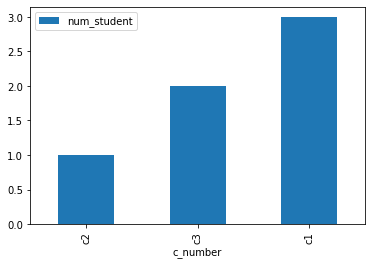

In [27]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

In [28]:
sql = """
    select professor.p_name,count(*) as num_course
    from professor
    inner join course
    on professor.p_email = course.p_email
    group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

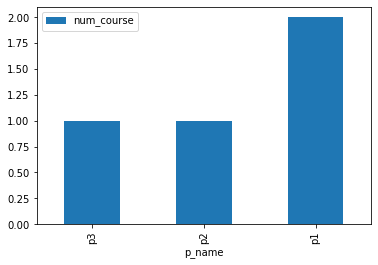

In [29]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

In [30]:
sql = '''
    insert into student(s_email, s_name, major)
    values('{}', '{}', '{}')
'''.format('s5@jmu.edu','s5','GS')
print(sql)


    insert into student(s_email, s_name, major)
    values('s5@jmu.edu', 's5', 'GS')



In [4]:
cur=conn.cursor()

In [36]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [33]:
conn.commit()

In [37]:
conn.rollback()

In [5]:
df=pandas.read_sql_query("select * from student",conn)
df[:]

,s_email,s_name,major
0,s1jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [23]:
sql = '''
    insert into professor(p_name,p_email,office)
    values('{}','{}','{}')
'''.format('p4','p4@jmu.edu','o4')
print(sql)


    insert into professor(p_name,p_email,office)
    values('p4','p4@jmu.edu','o4')



In [24]:
cur=conn.cursor()

In [25]:
cur.execute(sql)

In [26]:
conn.commit()

In [27]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,"p1@jmu,edu",p1,o1
1,"p2@jmu,edu",p2,o2
2,p3@jmu.edu,p3,o3
3,p4@jmu.edu,p4,o4


In [28]:
sql = '''
    insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
'''.format('c5','linkedin','r2','p4@jmu.edu')
print(sql)


    insert into course(c_number,c_name,room,p_email)
    values('c5','linkedin','r2','p4@jmu.edu')



In [29]:
cur=conn.cursor()

In [30]:
cur.execute(sql)

In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,"p1@jmu,edu"
1,c2,mongodb,r2,"p2@jmu,edu"
2,c3,twitter,r1,"p1@jmu,edu"
3,c4,facebook,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [46]:
sql = '''
    update course
    set p_email = 'p4@jmu.edu'
    where c_number = 'c2'
'''
print(sql)


    update course
    set p_email = 'p4@jmu.edu'
    where c_number = 'c2'



In [47]:
cur=conn.cursor()

In [48]:
cur.execute(sql)

In [49]:
conn.commit()

In [50]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,"p1@jmu,edu"
1,c3,twitter,r1,"p1@jmu,edu"
2,c4,facebook,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [51]:
sql = '''
    delete from professor
    where p_name = 'p2'
'''
print(sql)


    delete from professor
    where p_name = 'p2'



In [52]:
cur=conn.cursor()

In [53]:
cur.execute(sql)

In [54]:
conn.commit()

In [55]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,"p1@jmu,edu",p1,o1
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [56]:
cur.close()
conn.close()